In [16]:
# Libraries
library(ggraph)
library(igraph)
library(tidyverse)
 
# create a data frame giving the hierarchical structure of your individuals
set.seed(1234)
data <- read.csv(file = './emotionRelevanceWeight-threadhold3.csv')
d1 <- data.frame(from="origin", to=paste("group", seq(1,10), sep=""))
d2 <- data.frame(from=rep(d1$to, each=10), to=paste("subgroup", seq(1,100), sep="_"))
hierarchy <- rbind(d1, d2)

In [17]:
# create a dataframe with connection between leaves (individuals)
all_leaves <- paste("subgroup", seq(1,100), sep="_")
connect <- rbind( 
  data.frame( from=sample(all_leaves, 100, replace=T) , to=sample(all_leaves, 100, replace=T)), 
  data.frame( from=sample(head(all_leaves), 30, replace=T) , to=sample( tail(all_leaves), 30, replace=T)), 
  data.frame( from=sample(all_leaves[25:30], 30, replace=T) , to=sample( all_leaves[55:60], 30, replace=T)), 
  data.frame( from=sample(all_leaves[75:80], 30, replace=T) , to=sample( all_leaves[55:60], 30, replace=T)) )
connect$value <- runif(nrow(connect))

In [18]:
# create a vertices data.frame. One line per object of our hierarchy
vertices  <-  data.frame(
  name = unique(c(as.character(hierarchy$from), as.character(hierarchy$to))) , 
  value = runif(111)
) 


In [19]:
# Let's add a column with the group of each name. It will be useful later to color points
vertices$group  <-  hierarchy$from[ match( vertices$name, hierarchy$to ) ]

In [20]:
# Create a graph object
mygraph <- graph_from_data_frame( hierarchy, vertices=vertices )

In [21]:
# The connection object must refer to the ids of the leaves:
from  <-  match( connect$from, vertices$name)
to  <-  match( connect$to, vertices$name)

Warning message:
"Removed 1 rows containing missing values (geom_edge_path)."


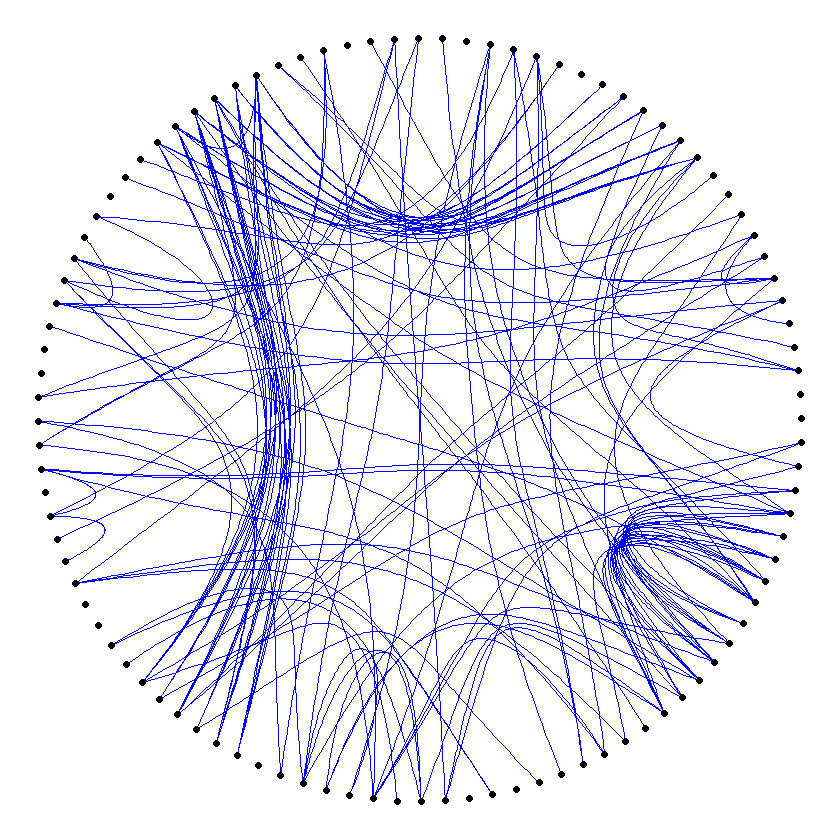

In [41]:
# Basic graph
ggraph(mygraph, layout = 'dendrogram', circular = TRUE) + 
  geom_conn_bundle(data = get_con(from = from, to = to), alpha=1, colour="blue", tension = .5, edge_width = 0.5) + 
  geom_node_point(aes(filter = leaf, x = x, y=y)) +
  theme_void()

Warning message:
"Removed 1 rows containing missing values (geom_edge_path)."
Warning message:
"Removed 1 rows containing missing values (geom_edge_path)."


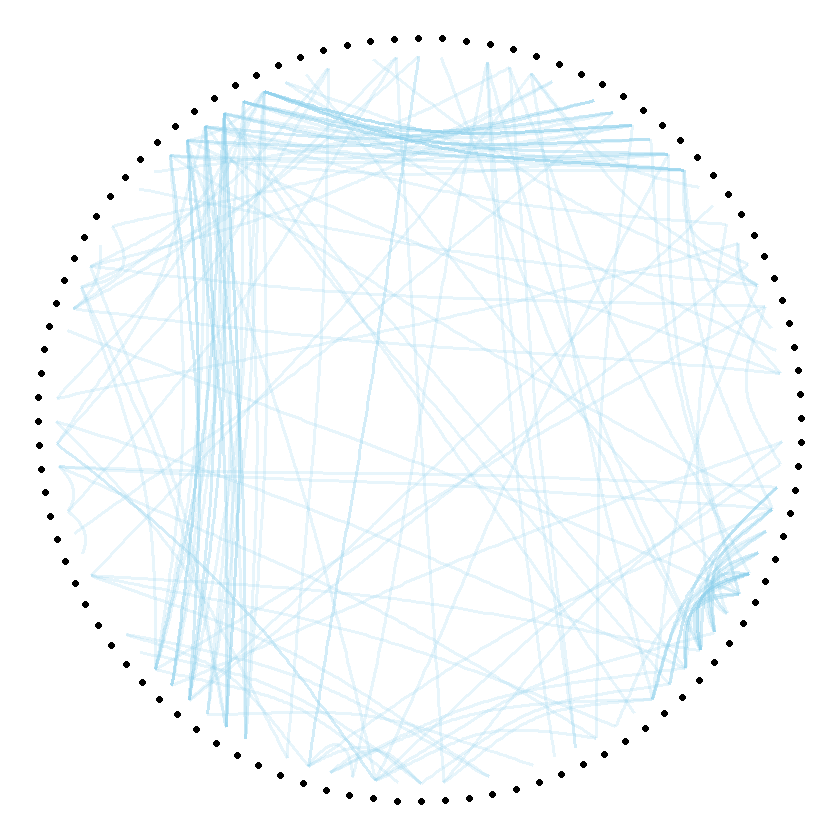

Warning message:
"Removed 1 rows containing missing values (geom_edge_path)."


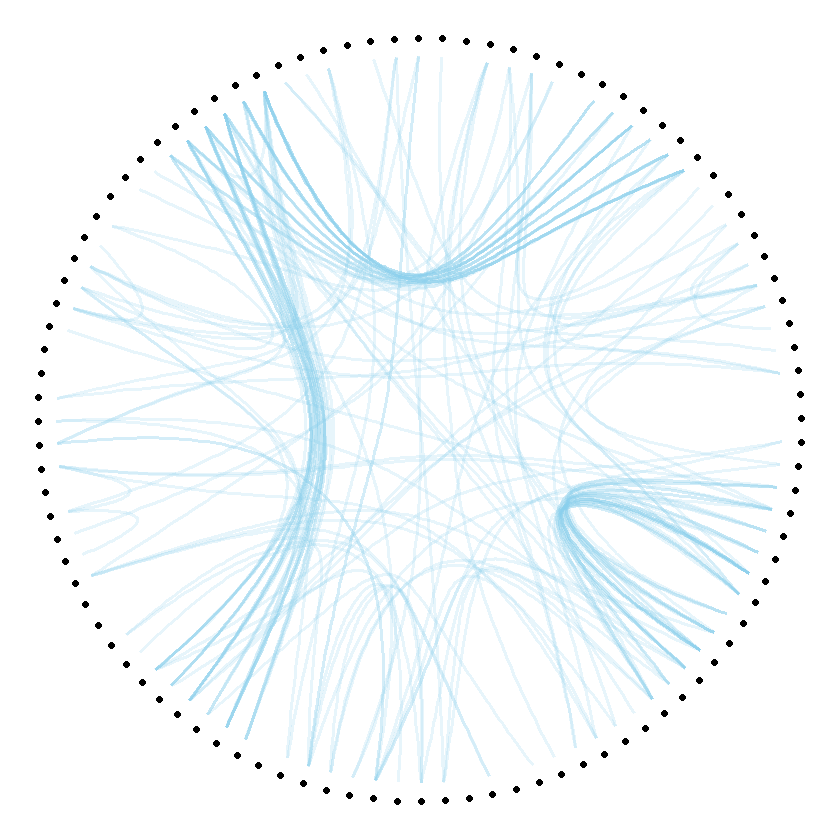

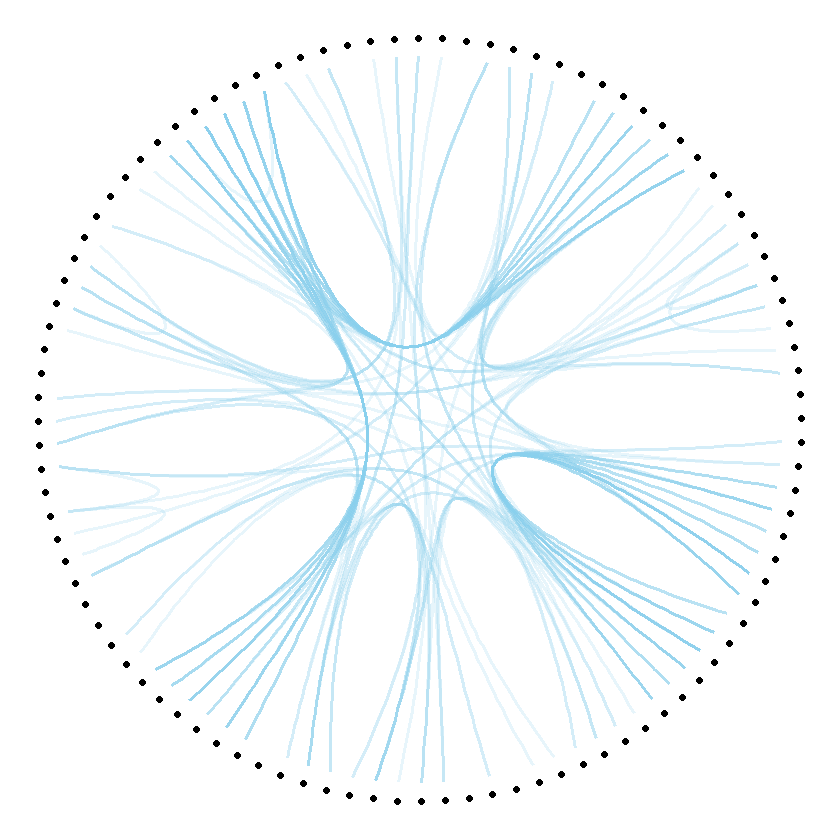

In [7]:
p <- ggraph(mygraph, layout = 'dendrogram', circular = TRUE) + 
  geom_node_point(aes(filter = leaf, x = x*1.05, y=y*1.05)) +
  theme_void()

# 0.1
p +  geom_conn_bundle(data = get_con(from = from, to = to), alpha=0.2, colour="skyblue", width=0.9, 
                      tension=0.1) 
# 0.7
p +  geom_conn_bundle(data = get_con(from = from, to = to), alpha=0.2, colour="skyblue", width=0.9, 
                      tension=0.7) 
#1
p +  geom_conn_bundle(data = get_con(from = from, to = to), alpha=0.2, colour="skyblue", width=0.9, 
                      tension=1) 